In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.interpolate import make_interp_spline, BSpline
import random

In [2]:
sns.set(color_codes=True)

In [3]:
att_df = pd.read_csv("dataframes/attribute_df_soco_a1.csv", header=0)
final_df = pd.read_csv("dataframes/soco_train_part_0.csv", header = 0)

In [4]:
att_copy = att_df.copy()
final_copy = final_df.copy()

In [5]:
def plot_missin_val(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    missing_data.head()

In [8]:
def plot_att_dist(df):
    for col in df:
        if col != "filename":
            plt.figure(figsize=(8,8))
            sns.distplot(att_copy[col]);
            plt.savefig('../../dissertation/images/a1/att_dist/'+col+'.png')
            plt.close()

In [6]:
att_copy.columns[0]

'Unnamed: 0'

In [7]:
att_copy.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
plot_att_dist(att_copy)

C:\Users\nyaku\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


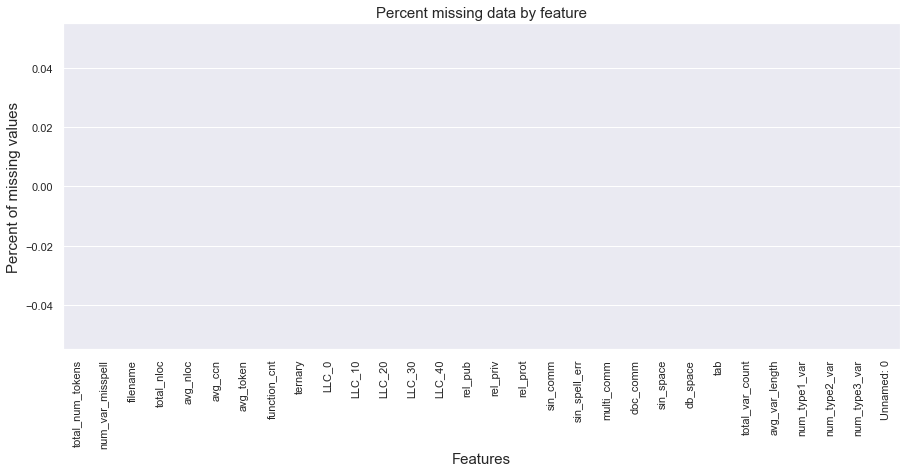

C:\Users\nyaku\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


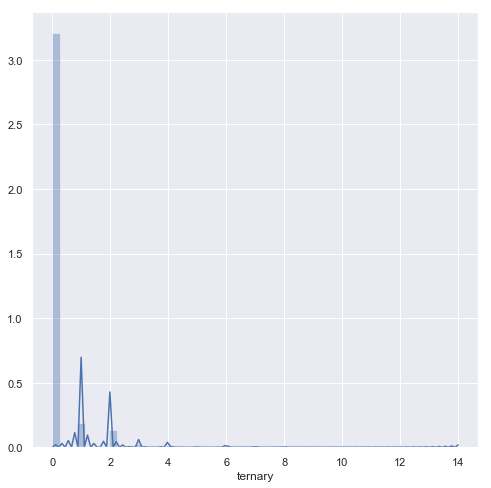

In [10]:
y = att_copy["ternary"]
plt.figure(figsize=(8,8))
sns.distplot(y, norm_hist=True);
# plt.savefig('../../dissertation/images/a1/att_dist/'+x+'.png')
# plt.close()

In [ ]:
col_df = final_copy.iloc[:, 2:-3]

In [ ]:
def get_random_f(max,min):
    temp = random.uniform(min,max+1)
    return temp if random.random() < 0.5 else -temp

In [ ]:
dict = {}
for col in col_df.columns.tolist():
    for x in range(10):
        
        upper = (x+1) * 10
        lower = x * 10
        print(col,lower,upper)
        
        mean = final_copy[(final_copy['gst_sim'] < upper) & (final_copy['gst_sim'] >= lower)][col].mean()
        while np.isnan(mean):
            lower -= 10
            if lower <= 0:
                lower = 0
                mean = 0
                break
            mean = final_copy[(final_copy['gst_sim'] < upper) & (final_copy['gst_sim'] >= lower)][col].mean()
        mean = mean + get_random_f(mean,mean/2.0)
        bool_table = (final_copy['gst_sim'] < upper) & (final_copy['gst_sim'] >= lower)
        final_copy.loc[bool_table,col] = final_copy.loc[bool_table, col].fillna(mean)
#         temp_df = final_copy.loc[(final_copy['gst_sim'] < upper) & (final_copy['gst_sim'] > lower)].copy()
#         temp_df.update(temp_df.loc[:,col].fillna(mean))
#         final_copy = temp_df
        dict[col,lower,upper] = mean

In [ ]:
for col in col_df.columns.tolist():
    for x in range(10):
        upper = (x+1) * 10
        lower = x * 10
        df = final_copy[(final_copy['gst_sim'] < upper) & (final_copy['gst_sim'] > lower)][col]
        print(col, upper, lower, df.mean())

In [ ]:
final_copy.iloc[:,2:-3]

In [ ]:
final_copy.isnull().any()

In [ ]:
testdf = final_copy[(np.abs(stats.zscore(final_copy.iloc[:,2:-3])) < 3).all(axis=1)].copy()

In [ ]:
vals = att_df['avg_token'].values.tolist()
minval = min(vals)
maxval = max(vals)
sns.distplot(vals)

In [ ]:
def plot_scatter_score(df_col):
    for x in df_col:
        fig, ax = plt.subplots(figsize=(8,8))
        sns.regplot(x=x, y="gst_sim", data=testdf,marker="o",
                    scatter_kws={"color":"darkred","s":5},fit_reg=False, logx=True)
        plt.savefig('../../dissertation/images/jfiles log/'+x+'.png')
        plt.close()

In [ ]:
columns_to_plot = testdf.columns.tolist()[2:-3]

In [ ]:
plot_scatter_score(columns_to_plot)

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
sns.boxplot(data=att_copy['sin_space'], palette="Set2")

In [ ]:
att_df = att_df[att_df['avg_token'] < 400]

In [ ]:
att_df.max()

In [ ]:
att_copy.max()